## Detect SVs in single chromosome, in cooler file

You need to specify the path to the cooler file in .mcool format ([how to convert .cool to .mcool](https://cooler.readthedocs.io/en/latest/api.html#cooler.zoomify_cooler)), specify resolution and chromosome name. Also, you could provide the name of device on which you prefer to perform calculations (CPU or GPU).

In [21]:
import cooler

c = cooler.Cooler('data/RHINO/RHINO_4DN.mcool::/resolutions/10000')
c.chromnames

['CM036946.1',
 'JAJIAY010000018.1',
 'JAJIAY010000019.1',
 'JAJIAY010000016.1',
 'JAJIAY010000017.1',
 'JAJIAY010000020.1',
 'JAJIAY010000021.1',
 'JAJIAY010000022.1',
 'JAJIAY010000023.1',
 'CM036947.1',
 'JAJIAY010000007.1',
 'JAJIAY010000008.1',
 'JAJIAY010000009.1',
 'JAJIAY010000010.1',
 'JAJIAY010000011.1',
 'JAJIAY010000012.1',
 'JAJIAY010000013.1',
 'JAJIAY010000014.1',
 'CM036948.1',
 'JAJIAY010000002.1',
 'JAJIAY010000003.1',
 'CM036949.1',
 'CM036950.1',
 'JAJIAY010000042.1',
 'CM036951.1',
 'JAJIAY010000043.1',
 'CM036952.1',
 'JAJIAY010000026.1',
 'JAJIAY010000025.1',
 'JAJIAY010000027.1',
 'CM036953.1',
 'JAJIAY010000030.1',
 'JAJIAY010000033.1',
 'JAJIAY010000034.1',
 'CM036954.1',
 'CM036955.1',
 'JAJIAY010000037.1',
 'JAJIAY010000038.1',
 'CM036956.1',
 'CM036957.1',
 'JAJIAY010000051.1',
 'JAJIAY010000050.1',
 'CM036958.1',
 'JAJIAY010000093.1',
 'CM036959.1',
 'JAJIAY010000087.1',
 'CM036960.1',
 'JAJIAY010000049.1',
 'JAJIAY010000047.1',
 'CM036961.1',
 'JAJIAY0100

In [6]:
import torch
from torch import nn
import torch.nn.functional as F
from torchsummary import summary
import cooler
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from tqdm import tqdm
from collections import OrderedDict
from torchvision.transforms import GaussianBlur

class ClearPatchesDataset(Dataset):
    def __init__(self, cooler_path, resolution, image_size, coords, res_step):
        self.resolution = resolution
        self.image_size = image_size
        c = cooler.Cooler(f'{cooler_path}::/resolutions/{resolution}').matrix(balance=False)
        self.cooler = c
        self.coords_list = coords
        self.res_step = res_step
    def __len__(self):
        return len(self.coords_list)

    def __getitem__(self, idx):
        x, y = self.coords_list[idx]
        x = int(x * self.res_step)
        y = int(y * self.res_step)
        mat = np.log2(self.cooler[x-int(self.image_size//2):x+int(self.image_size//2), y-int(self.image_size//2):y+int(self.image_size//2)])
        return mat, (x, y)
local_path = 'D:/Study/HICT/HICT_Patterns/'
detected_5 = np.genfromtxt(f"{local_path}stage5.csv", delimiter=",")
image_size_5 = 24
resolution_4 = 5000
resolution_6 = 1000
image_size_6 = image_size_5*(resolution_4//resolution_6)
res_step = resolution_4 // resolution_6
dataset = ClearPatchesDataset('data\MALI_ARAB\Mali_Arab_4DN.mcool', resolution_6, image_size_6, detected_5, res_step)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
detected_6 = []
for data, position in tqdm(dataloader):
    patch = data[0].cpu().numpy()
    max_value = np.nanmax(patch)
    center_value = patch[image_size_6//2, image_size_6//2]
    if max_value-center_value > max_value//4:
        center = np.unravel_index(patch.argmax(), patch.shape)
        dot = ((position[0].item()+center[0], position[1].item()+center[1]))
        detected_6.append(dot)
    else:
        detected_6.append((position[0].item(), position[1].item()))

  0%|          | 0/67 [00:00<?, ?it/s]C:\Users\vit\AppData\Local\Temp\ipykernel_22632\3889322528.py:29: RuntimeWarning: divide by zero encountered in log2
  mat = np.log2(self.cooler[x-int(self.image_size//2):x+int(self.image_size//2), y-int(self.image_size//2):y+int(self.image_size//2)])
 13%|█▎        | 9/67 [00:00<00:00, 86.91it/s]

[tensor([9255]), tensor([3350])]
[tensor([8055]), tensor([5650])]
[tensor([14830]), tensor([270])]
[tensor([14895]), tensor([7350])]
[tensor([15275]), tensor([7360])]
[tensor([17135]), tensor([5660])]
[tensor([15275]), tensor([7360])]
[tensor([17095]), tensor([5660])]
[tensor([15275]), tensor([7360])]
[tensor([17095]), tensor([5660])]
[tensor([15275]), tensor([7360])]
[tensor([17135]), tensor([5660])]
[tensor([15275]), tensor([7360])]
[tensor([17135]), tensor([5660])]
[tensor([15275]), tensor([7360])]
[tensor([17135]), tensor([5660])]
[tensor([15275]), tensor([7360])]
[tensor([17095]), tensor([5660])]
[tensor([15275]), tensor([7360])]


 46%|████▋     | 31/67 [00:00<00:00, 98.96it/s]

[tensor([17095]), tensor([5660])]
[tensor([15275]), tensor([7360])]
[tensor([17210]), tensor([5660])]
[tensor([31695]), tensor([29415])]
[tensor([75440]), tensor([19265])]
[tensor([51295]), tensor([46490])]
[tensor([51295]), tensor([46490])]
[tensor([51130]), tensor([46685])]
[tensor([51295]), tensor([46490])]
[tensor([51295]), tensor([46490])]
[tensor([51295]), tensor([46490])]
[tensor([51130]), tensor([46685])]
[tensor([51295]), tensor([46490])]
[tensor([51130]), tensor([46685])]
[tensor([51295]), tensor([46490])]
[tensor([51295]), tensor([46490])]
[tensor([51130]), tensor([46685])]
[tensor([51295]), tensor([46490])]
[tensor([51295]), tensor([46490])]
[tensor([51130]), tensor([46685])]
[tensor([51125]), tensor([47930])]
[tensor([52575]), tensor([46545])]


 82%|████████▏ | 55/67 [00:00<00:00, 108.17it/s]

[tensor([51125]), tensor([47930])]
[tensor([52575]), tensor([46545])]
[tensor([51125]), tensor([47930])]
[tensor([52575]), tensor([46545])]
[tensor([51125]), tensor([47930])]
[tensor([52575]), tensor([46755])]
[tensor([52300]), tensor([47400])]
[tensor([53055]), tensor([52230])]
[tensor([89830]), tensor([20450])]
[tensor([63535]), tensor([61850])]
[tensor([113365]), tensor([17770])]
[tensor([75440]), tensor([59440])]
[tensor([72945]), tensor([63410])]
[tensor([73770]), tensor([72565])]
[tensor([77415]), tensor([75440])]
[tensor([81620]), tensor([75440])]
[tensor([82340]), tensor([78315])]
[tensor([90045]), tensor([89390])]
[tensor([91585]), tensor([89390])]
[tensor([91585]), tensor([90590])]
[tensor([144115]), tensor([89830])]
[tensor([174490]), tensor([75465])]
[tensor([189100]), tensor([75440])]
[tensor([186660]), tensor([78315])]


100%|██████████| 67/67 [00:00<00:00, 102.88it/s]

[tensor([174940]), tensor([173075])]
[tensor([186640]), tensor([183725])]


: 

In [10]:
resolution_1 = 50000
image_size_1 = 48
dataset = EvalDatasetDiag('data/RHINO/RHINO_4DN.mcool', resolution=resolution_1, image_size=image_size_1, step=image_size_1//2)

In [12]:
int(np.sum(c.chromsizes.values))

-1075

In [7]:
c.chromsizes

name
CM036946.1           95316614
JAJIAY010000018.1     8065355
JAJIAY010000019.1     7942775
JAJIAY010000016.1     3339939
JAJIAY010000017.1     2443258
                       ...   
JAJIAY010001073.1       36441
JAJIAY010000836.1       36413
JAJIAY010001074.1       36386
JAJIAY010000837.1       36349
JAJIAY010001075.1       36348
Name: length, Length: 1075, dtype: int32

In [1]:
import cooler
import tensorflow as tf

c = cooler.Cooler('data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/10000')
print(f'List of available chromosomes:{c.chromnames}')
print(f'List of available devices:\n{tf.config.list_logical_devices("CPU")}\n{tf.config.list_logical_devices("GPU")}')

List of available chromosomes:['X', '2R', '2L', '3R', '3L', 'scaffold_11', 'scaffold_12', 'scaffold_14', 'scaffold_16', 'scaffold_17', 'scaffold_19', 'scaffold_20', 'scaffold_21', 'scaffold_22', 'scaffold_23', 'scaffold_24', 'scaffold_25', 'scaffold_26', 'scaffold_27', 'scaffold_28', 'scaffold_29', 'scaffold_30', 'scaffold_31', 'scaffold_32', 'scaffold_33', 'scaffold_34', 'scaffold_35', 'scaffold_36', 'scaffold_37', 'scaffold_38', 'scaffold_39', 'scaffold_40', 'scaffold_41', 'scaffold_42', 'scaffold_43', 'scaffold_44', 'scaffold_45', 'scaffold_46', 'scaffold_47', 'scaffold_48', 'scaffold_49', 'scaffold_50', 'scaffold_51', 'scaffold_52', 'scaffold_53', 'scaffold_54', 'scaffold_55', 'scaffold_56', 'scaffold_57', 'scaffold_58', 'scaffold_59', 'scaffold_60', 'scaffold_61', 'scaffold_62', 'scaffold_63', 'scaffold_64', 'scaffold_65', 'scaffold_66', 'scaffold_67', 'scaffold_68', 'scaffold_69', 'scaffold_70', 'scaffold_71', 'scaffold_72', 'scaffold_73', 'scaffold_74', 'scaffold_75', 'scaffold_

In [2]:
from hict_patterns import predict_cooler_single_chromosome

detections_list_2L = predict_cooler_single_chromosome(cooler_file_path="data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool",
                                 resolution=10000,
                                 chromname="2L",
                                 device_name='/device:GPU:0')

ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).

Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (20, 20)

Call arguments received by layer "sequential" "                 f"(type Sequential):
  • inputs=tf.Tensor(shape=(20, 20), dtype=float32)
  • training=False
  • mask=None

Function returns list of coordinates of detected SVs, which could be visualised this way:

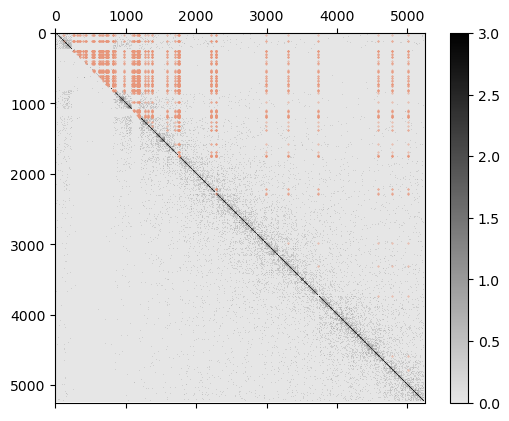

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np

c = cooler.Cooler('data/ARAb_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/10000')
matrix = c.matrix(balance=False).fetch('2L')

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix+1), cmap=clr.LinearSegmentedColormap.from_list('yarg', ['#e6e6e6','#000'], N=256))
fig.colorbar(im)

plt.scatter([i[0]//10000 for i in detections_list_2L],[i[1]//10000 for i in detections_list_2L],s=0.1, c='#E9967A')

## Detect SVs in all chromosomes, only interchromosomal rearrangements, in cooler file
This function works same way as *predict_cooler_single_chromosome*, but applies it to every chromosome in file

In [1]:
from hict_patterns import predict_cooler

detections_list = predict_cooler(cooler_file_path="data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool",
                                 resolution=50000,
                                 interchromosome=True,
                                 device_name='/device:GPU:0')

c:\Users\vit\.conda\envs\HICT\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\vit\.conda\envs\HICT\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\vit\.conda\envs\HICT\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


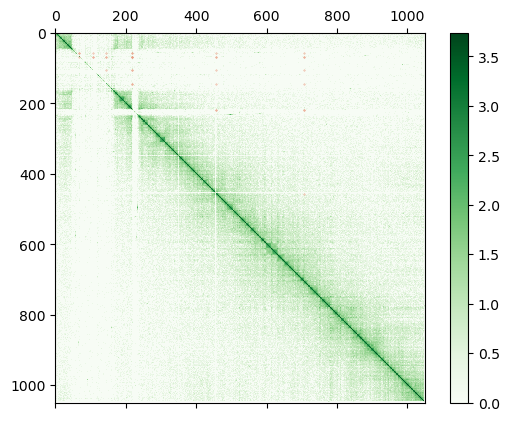

In [8]:
c = cooler.Cooler('data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/50000')
matrix = c.matrix(balance=False).fetch('2L')

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix+1), cmap='Greens')
fig.colorbar(im)

detections = detections_list['2L']
plt.scatter([i[0]//50000 for i in detections],[i[1]//50000 for i in detections],s=0.1, c='#E9967A')

## Detect SVs in all chromosomes, inter- and intrachromosomal rearrangements, in cooler file
To detect all kinds of rearrangements specify *interchromosome=False*. This method of searching for rearrangements will take the longest amount of time due to the large amount of data that needs to be inspected.

In [7]:
detections_list = predict_cooler(cooler_file_path="data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool",
                                 resolution=10000,
                                 interchromosome=False,
                                 device_name='/device:GPU:0')

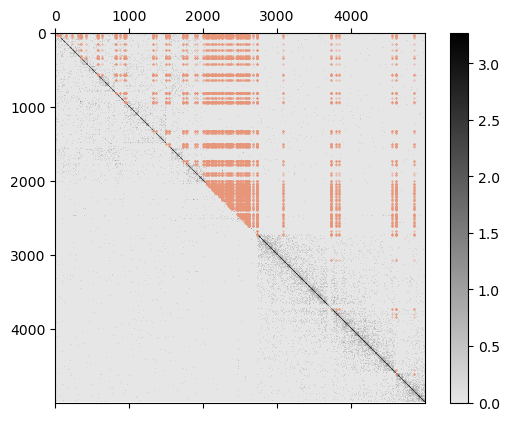

In [13]:
c = cooler.Cooler('data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/10000')
matrix = c.matrix(balance=False)[0:5000, 0:5000]

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix+1), cmap=clr.LinearSegmentedColormap.from_list('yarg', ['#e6e6e6','#000'], N=256))
fig.colorbar(im)

detections = [(x,y) for x,y in detections_list if x//10000 < 5000 and y//10000<5000]
plt.scatter([i[0]//10000 for i in detections],[i[1]//10000 for i in detections],s=0.1, c='#E9967A')